In [2]:
#visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from plotnine import *
%matplotlib inline

In [3]:
#!pip install pandas plotnine

In [4]:
#reading the data
data=pd.read_csv("movies 2016.csv").dropna()
data.head()

,Rank,Title,Description,Runtime,Genre,Rating,Metascore,Votes,Gross_Earning,Director,Actor
0,2,Suicide Squad,A secret government agency recruits some of th...,123,Action,5.9,40.0,656097,325.10,David Ayer,Will Smith
1,3,Deadpool,A wisecracking mercenary gets experimented on ...,108,Action,8.0,65.0,958507,363.00,Tim Miller,Ryan Reynolds
2,4,Doctor Strange,While on a journey of physical and spiritual h...,115,Action,7.5,72.0,653299,232.60,Scott Derrickson,Benedict Cumberbatch
3,7,Busanhaeng,While a zombie virus breaks out in South Korea...,118,Action,7.6,72.0,194512,2.13,Sang-ho Yeon,Gong Yoo
4,8,Ghostbusters,"Following a ghost invasion of Manhattan, paran...",117,Action,6.5,60.0,215403,128.30,Paul Feig,Melissa McCarthy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           89 non-null     int64  
 1   Title          89 non-null     object 
 2   Description    89 non-null     object 
 3   Runtime        89 non-null     int64  
 4   Genre          89 non-null     object 
 5   Rating         89 non-null     float64
 6   Metascore      89 non-null     float64
 7   Votes          89 non-null     int64  
 8   Gross_Earning  89 non-null     float64
 9   Director       89 non-null     object 
 10  Actor          89 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ KB


In [5]:
#grouping gross earning by genre
data2=data.groupby('Genre')['Gross_Earning'].sum().to_frame().reset_index()
data2.head()

,Genre,Gross_Earning
0,Action,4195.74
1,Adventure,690.44
2,Animation,1971.31
3,Biography,553.67
4,Comedy,420.82


In [6]:
#sorting the values by ascending order
data3=data2.sort_values(by='Gross_Earning',ascending=True)
data3.head()

,Genre,Gross_Earning
5,Crime,171.84
7,Horror,242.71
4,Comedy,420.82
6,Drama,455.42
3,Biography,553.67


Text(0, 0.5, 'Genre')

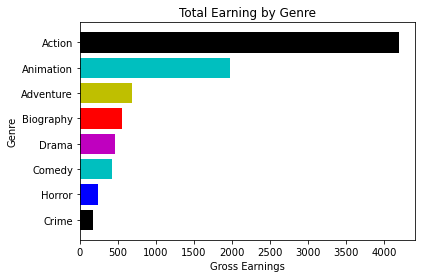

In [7]:
#plotting gross earning by genre
plt.barh(data3["Genre"],data3["Gross_Earning"],color=['k','b','c','m','r','y','c'])

#aesthetics
plt.title("Total Earning by Genre")
plt.xlabel("Gross Earnings")
plt.ylabel("Genre")

<AxesSubplot:title={'center':'Gross_Earning'}, xlabel='Genre'>

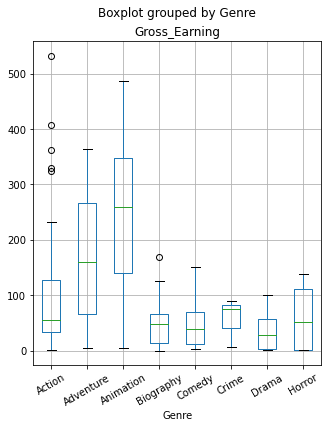

In [8]:
#plotting boxplots of gross earning against genre
#you see action movies are overrated
data.boxplot("Gross_Earning","Genre",rot=30,figsize=(5,6))

In [9]:
#what are the metascores
print(data['Metascore'])
print(data['Metascore'].isnull())

0     40.0
1     65.0
2     72.0
3     72.0
4     60.0
      ... 
91    64.0
92    62.0
94    65.0
95    51.0
99    35.0
Name: Metascore, Length: 89, dtype: float64
0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
94    False
95    False
99    False
Name: Metascore, Length: 89, dtype: bool


In [ ]:
# Making a list of missing value types
#very important code
#missing_values = ["n/a", "na", "--"]
#df = pd.read_csv("property data.csv", na_values = missing_values)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           89 non-null     int64  
 1   Title          89 non-null     object 
 2   Description    89 non-null     object 
 3   Runtime        89 non-null     int64  
 4   Genre          89 non-null     object 
 5   Rating         89 non-null     float64
 6   Metascore      89 non-null     float64
 7   Votes          89 non-null     int64  
 8   Gross_Earning  89 non-null     float64
 9   Director       89 non-null     object 
 10  Actor          89 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ KB


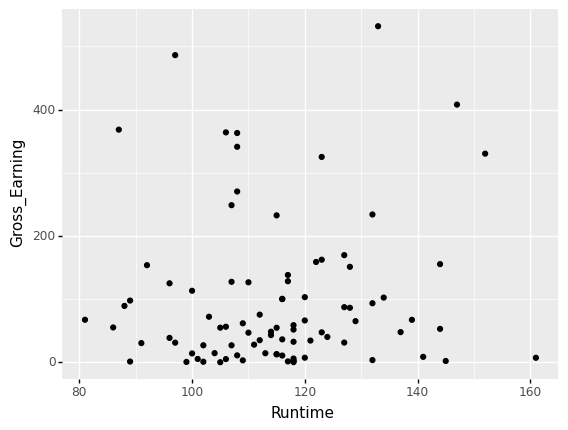

<ggplot: (135549305622)>

In [12]:
#plotting with ggplot
#a data frame containing our data
#how columns of the data frame can be translated into positions
#(aesthetics)
#the actual objects to display, "geometric objects"
ggplot(data,
      aes(x="Runtime",y="Gross_Earning"))+ geom_point()

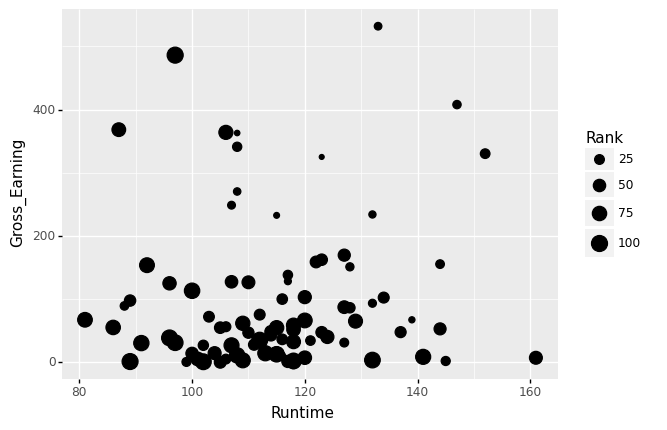

<ggplot: (135554751754)>

In [14]:
#adding information, say genre
ggplot(data,
       aes(x='Runtime',y='Gross_Earning',size='Rank'))+geom_point()

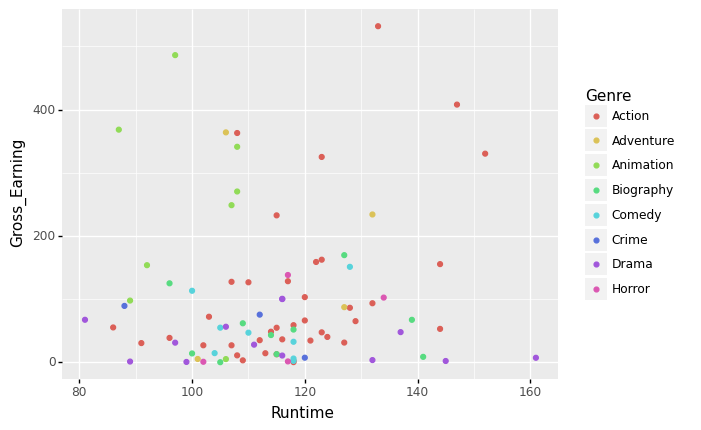

<ggplot: (135554691398)>

In [15]:
#changing color in ggplot by using genre for coloring
ggplot(data,
      aes(x="Runtime",y='Gross_Earning',color='Genre'))+ geom_point()

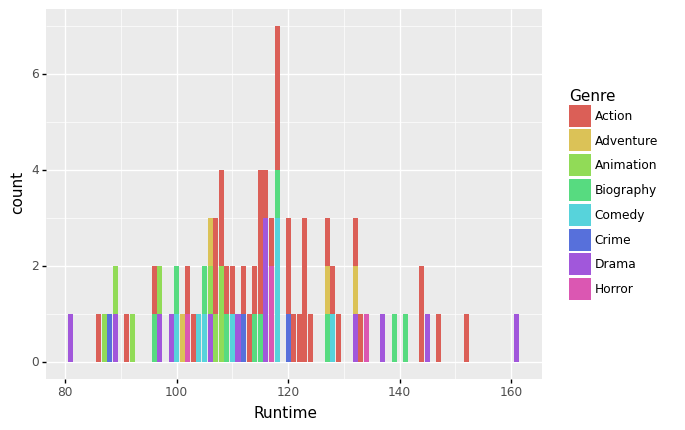

<ggplot: (135556484928)>

In [28]:
#plot on runtime by genre
ggplot(data,
      aes(x="Runtime",fill="Genre",bins=40))+\
    geom_bar()

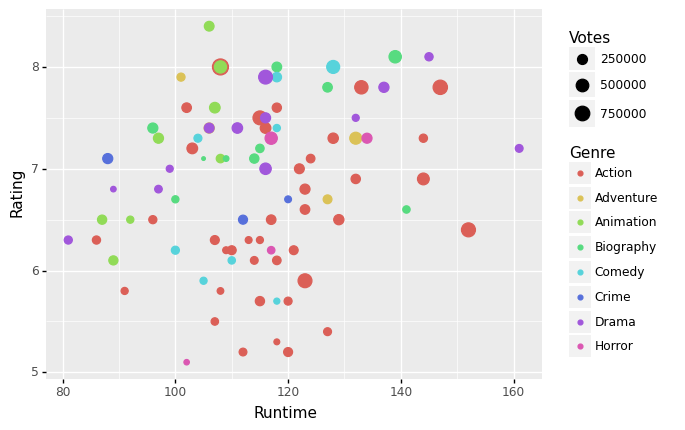

<ggplot: (135556657930)>

In [30]:
#plotting rating by runtime and coloring by genre and 
#setting the size of the dots by the votes each movie received
ggplot(data,aes(x='Runtime',y='Rating'))+\
  geom_point(aes(size='Votes',color='Genre'))

C:\Users\John\anaconda3\lib\site-packages\plotnine\positions\position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


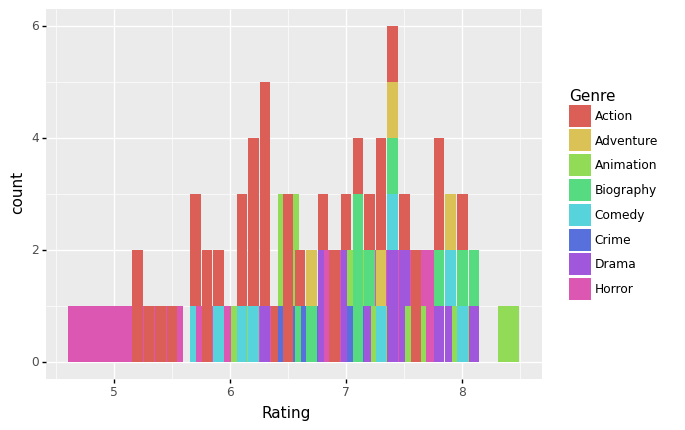

<ggplot: (135554814823)>

In [39]:
#what are the ratings by genre
ggplot(data,
      aes(x='Rating',fill='Genre',binwidth=10))+\
    geom_bar()

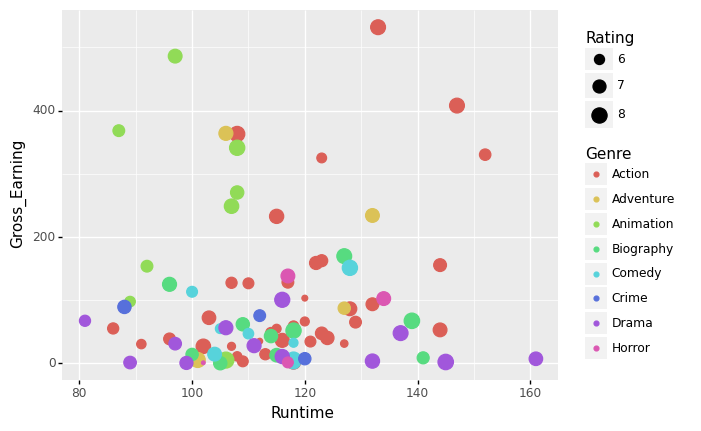

<ggplot: (191583872720)>

In [5]:
#plotting gross earning against runtime
#adding size of dots and color by genre
ggplot(data,aes(x='Runtime',y='Gross_Earning'))+\
  geom_point(aes(size='Rating',color='Genre'))


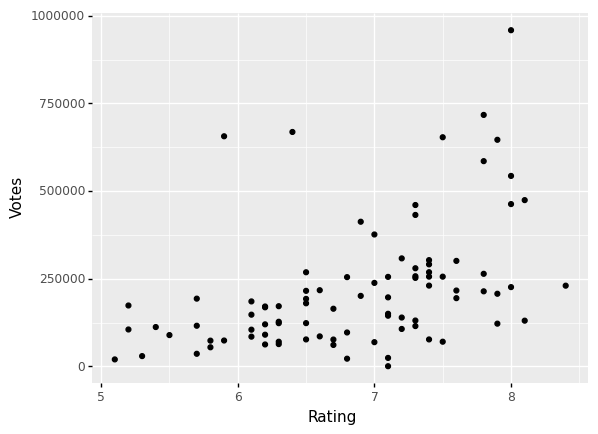

<ggplot: (132734998137)>

In [53]:
#plotting votes and rating
ggplot(data,
      aes(x='Rating',y='Votes'))+ geom_point()

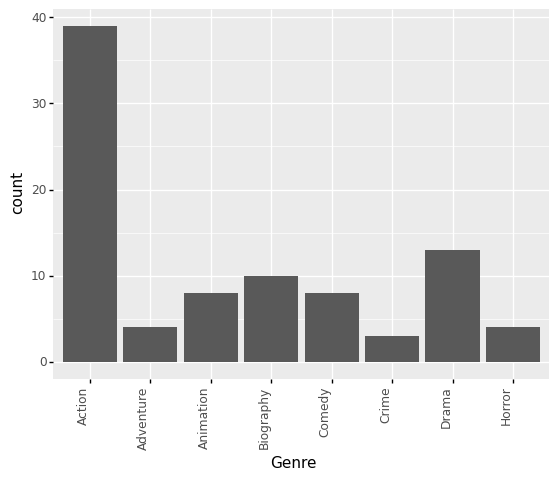

<ggplot: (135554896514)>

In [24]:
#trying to plot frequencies
ggplot(data,
      aes(x='Genre')) + \
geom_bar(stat='count')+\
flip_xlabels

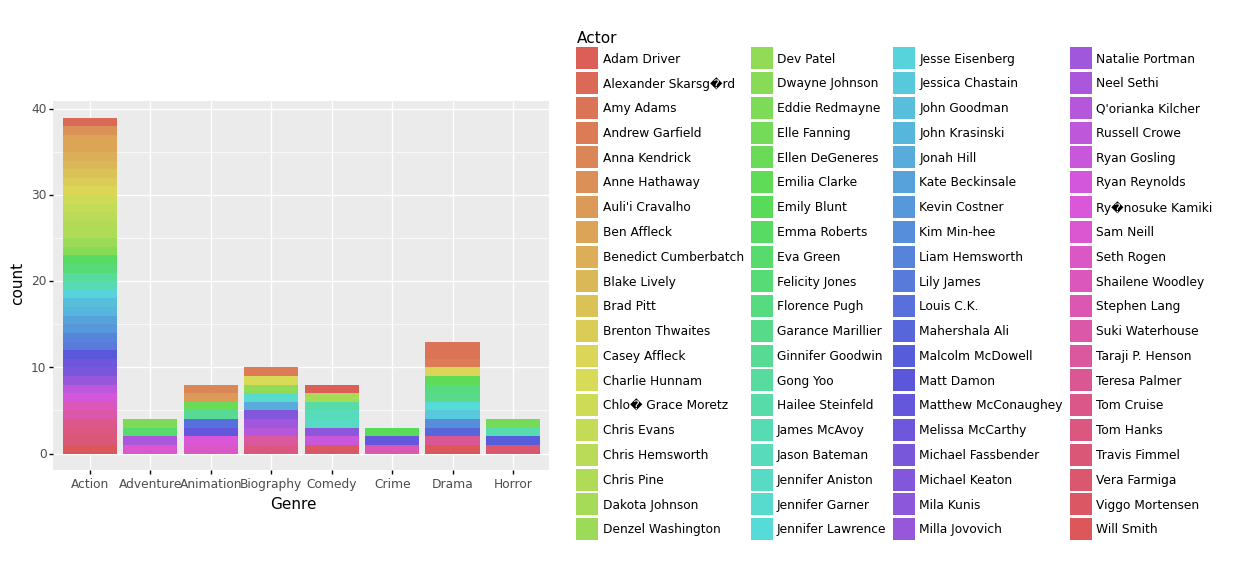

<ggplot: (132736734775)>

In [59]:
#plotting genre by actor
ggplot(data,
      aes(x='Genre',fill='Actor')) + \
    geom_bar(stat='count')

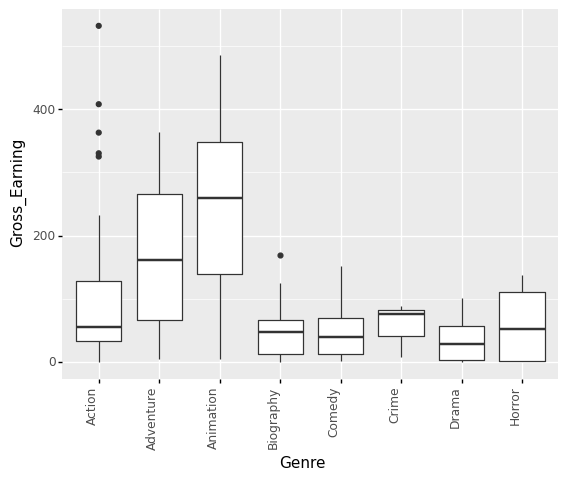

<ggplot: (132736994226)>

In [83]:
#boxplot boxplots of gross earning by genre using ggplot
ggplot(data,
      aes(x='Genre',y="Gross_Earning")) + \
    stat_boxplot()+\
    flip_xlabels


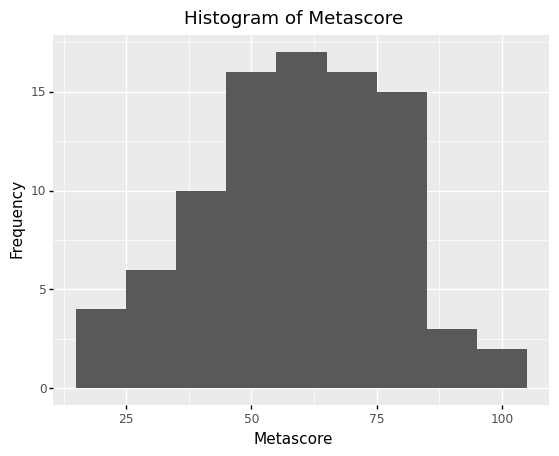

<ggplot: (132734594786)>

In [72]:
#histogram of metascore
ggplot(data,
      aes(x='Metascore'))+\
    geom_histogram(binwidth=10)+\
    ggtitle('Histogram of Metascore')+\
    xlab('Metascore')+\
    ylab('Frequency')

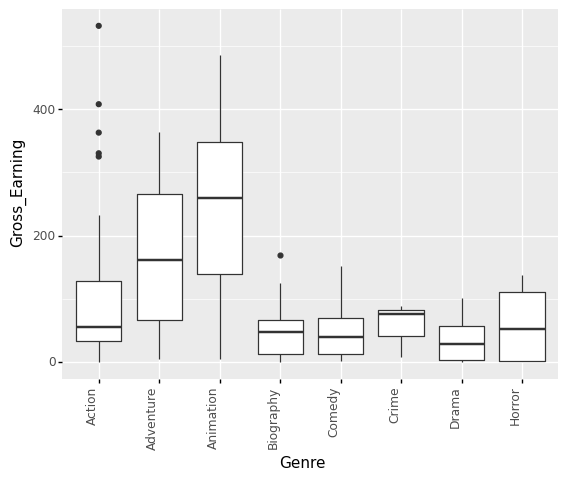

<ggplot: (132736996804)>

In [80]:
#trying to make the axis better by adding element text
ggplot(data,
      aes(x='Genre',y="Gross_Earning")) + \
    stat_boxplot()+\
    theme(axis_text_x=element_text(angle=90,hjust=1))

In [23]:
#defining flipping labels as a variable to keep
flip_xlabels=theme(axis_text_x=element_text(angle=90,hjust=1))

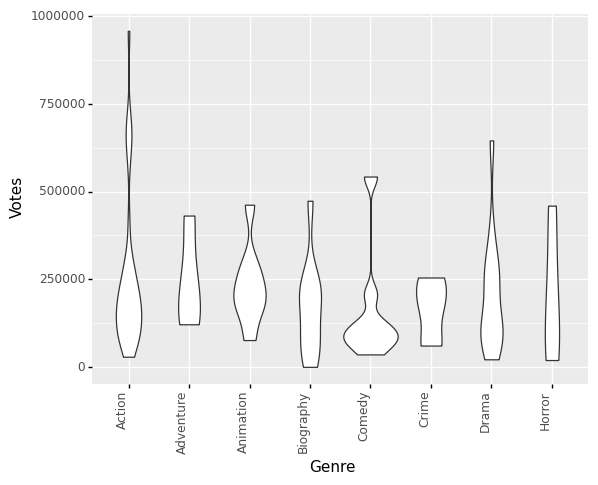

<ggplot: (132735144280)>

In [93]:
#what about violins
ggplot(data,
      aes(x='Genre',y='Votes'))+\
    geom_violin()+\
    flip_xlabels

In [87]:
#saving an image for later
plt1=ggplot(data,aes(x='Genre',y='Gross_Earning'))+\
    geom_boxplot()+\
    xlab("Years")+\
    ggtitle("Boxplots, summary of species weight in each year")

ggsave(filename="plot2.png",
      plot=plt1,
      dpi=300,
      height=25,
      width=25)

C:\Users\John\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 25 x 25 in image.
C:\Users\John\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plot2.png


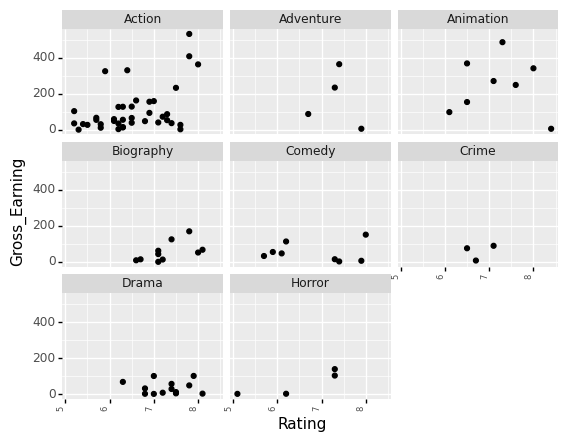

<ggplot: (132616256784)>

In [97]:
#adding facets
ggplot(data,
      aes(x='Rating',y="Gross_Earning"))+\
    geom_point()+\
    facet_wrap(['Genre'])+\
    flip_xlabels+\
    theme(axis_text_x=element_text(size=6))

In [104]:
#binning the runtime of the movies
bins=[(data['Runtime']<60),
     (data['Runtime']<90),
     (data['Runtime']<120),
     (data['Runtime']>=120)]
labels=['under_1hr',"1.5hrs",'under_2hr','2hr_above']

data['time_bins']=np.select(bins,labels)
data.head()

,Rank,Title,Description,Runtime,Genre,Rating,Metascore,Votes,Gross_Earning,Director,Actor,gross_log,time_bins
0,2,Suicide Squad,A secret government agency recruits some of th...,123,Action,5.9,40.0,656097,325.10,David Ayer,Will Smith,8.344740,2hr_above
1,3,Deadpool,A wisecracking mercenary gets experimented on ...,108,Action,8.0,65.0,958507,363.00,Tim Miller,Ryan Reynolds,8.503826,under_2hr
2,4,Doctor Strange,While on a journey of physical and spiritual h...,115,Action,7.5,72.0,653299,232.60,Scott Derrickson,Benedict Cumberbatch,7.861707,under_2hr
3,7,Busanhaeng,While a zombie virus breaks out in South Korea...,118,Action,7.6,72.0,194512,2.13,Sang-ho Yeon,Gong Yoo,1.090853,under_2hr
4,8,Ghostbusters,"Following a ghost invasion of Manhattan, paran...",117,Action,6.5,60.0,215403,128.30,Paul Feig,Melissa McCarthy,7.003377,under_2hr


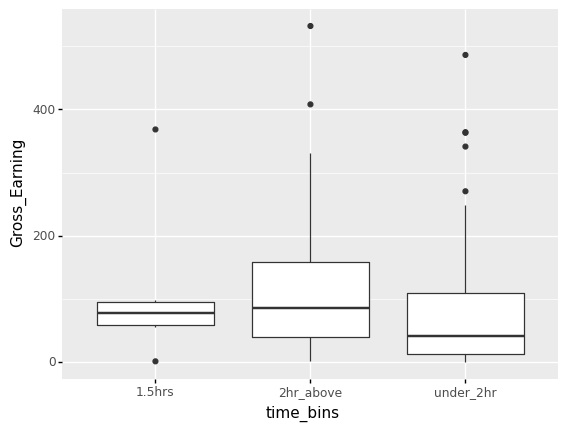

<ggplot: (132736777515)>

In [107]:
#plotting
plt2=ggplot(data,aes(x='time_bins',y='Gross_Earning'))+\
    geom_boxplot()
plt2

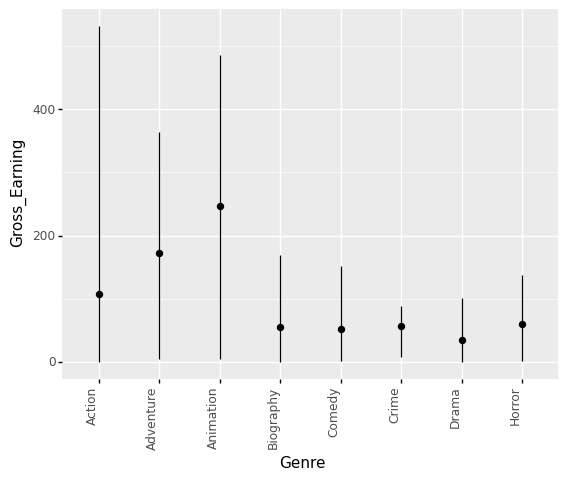

<ggplot: (132616690017)>

In [108]:
#last plot
ggplot(data, aes("Genre", "Gross_Earning")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

ggplot(data, aes("Genre", "Gross_Earning")) + \
    stat_summary(fun_y = np.median, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))

ggplot(data, aes("Genre", "Gross_Earning")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle=90, hjust=1))